In [1]:
#STEP: Import libraries for model 
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics

D:\InstalledSoftware\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#STEP: Design Covn model with MaxPooling
def model_conv():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3))) # 150 X 150 is an arbitrary choice
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation = 'relu'))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    
    model.compile(optimizer = optimizers.RMSprop(lr = 1e-4),
                 loss = losses.binary_crossentropy,
                 metrics = [metrics.binary_accuracy])
    return model

In [3]:
#STEP: Using ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'C:/Users/write/OneDrive/Deep Learning Data/cats_and_dogs_subset/train'
validation_dir = 'C:/Users/write/OneDrive/Deep Learning Data/cats_and_dogs_subset/validation'
test_dir = 'C:/Users/write/OneDrive/Deep Learning Data/cats_and_dogs_subset/test'

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size = (150, 150),
            batch_size = 20,
            class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size = (150, 150),
            batch_size = 20,
            class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
#STEP (optional): Let's look at the output of one of these generators
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


In [5]:
#STEP: Fitting model using a batch generator

model = model_conv()
history_conv = model.fit_generator(
    train_generator,
    steps_per_epoch = 100, #100 gradient decent steps
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50 #50 gradient decent steps
    ,verbose = 0
    ) 

Epoch 1/30
100/100 [==============================] - 167s 2s/step - loss: 0.6869 - binary_accuracy: 0.5540 - val_loss: 0.6706 - val_binary_accuracy: 0.5540
Epoch 2/30
100/100 [==============================] - 149s 1s/step - loss: 0.6556 - binary_accuracy: 0.6060 - val_loss: 0.6335 - val_binary_accuracy: 0.6360
Epoch 3/30
100/100 [==============================] - 148s 1s/step - loss: 0.6098 - binary_accuracy: 0.6695 - val_loss: 0.6043 - val_binary_accuracy: 0.6670
Epoch 4/30
100/100 [==============================] - 149s 1s/step - loss: 0.5652 - binary_accuracy: 0.7035 - val_loss: 0.6016 - val_binary_accuracy: 0.6670
Epoch 5/30
100/100 [==============================] - 147s 1s/step - loss: 0.5345 - binary_accuracy: 0.7240 - val_loss: 0.5936 - val_binary_accuracy: 0.6750
Epoch 6/30
100/100 [==============================] - 148s 1s/step - loss: 0.5039 - binary_accuracy: 0.7560 - val_loss: 0.5813 - val_binary_accuracy: 0.6980
Epoch 7/30
100/100 [==============================] - 149s

In [6]:
#STEP: Save model
model.save('cats_and_dogs_subset_1.h5')

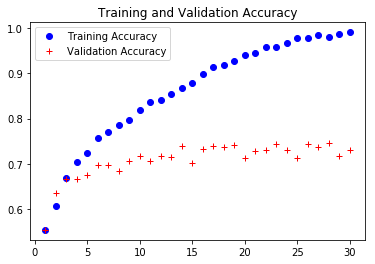

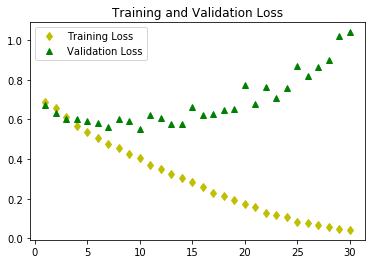

In [8]:
import matplotlib.pyplot as plt

acc = history_conv.history['binary_accuracy']
val_acc = history_conv.history['val_binary_accuracy']
loss = history_conv.history['loss']
val_loss = history_conv.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r+', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'yd', label = 'Training Loss')
plt.plot(epochs, val_loss, 'g^', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()